#  WQD7006 Machine Learning Group Project: Diabetic Retinopathy Detection 

### Data source (Diabetic Retinopathy Debrecen Data Set):
The data used in this machine learning project can be found at UCI Machine Learning Repository.  
<https://archive.ics.uci.edu/ml/datasets/Diabetic+Retinopathy+Debrecen+Data+Set>

### Attribute Information:

0. quality: The binary result of quality assessment. 0 = bad quality 1 = sufficient quality.
1. prescreen: The binary result of pre-screening, where 1 indicates severe retinal abnormality and 0 indicates its lack.
2. ma_detection_0.5: The results of MA detection, which is the number of MAs found at the confidence level alpha = 0.5
3. ma_detection_0.6: The results of MA detection, which is the number of MAs found at the confidence level alpha = 0.6
4. ma_detection_0.7: The results of MA detection, which is the number of MAs found at the confidence level alpha = 0.7
5. ma_detection_0.8: The results of MA detection, which is the number of MAs found at the confidence level alpha = 0.8
6. ma_detection_0.9: The results of MA detection, which is the number of MAs found at the confidence level alpha = 0.9
7. ma_detection_1.0: The results of MA detection, which is the number of MAs found at the confidence level alpha = 1.0
8. exudates_0.1: The number of exudates found at the confidence level alpha = 0.1 with normalization*.
9. exudates_0.2: The number of exudates found at the confidence level alpha = 0.2 with normalization*.
10. exudates_0.3: The number of exudates found at the confidence level alpha = 0.3 with normalization*.
11. exudates_0.4: The number of exudates found at the confidence level alpha = 0.4 with normalization*.
12. exudates_0.5: The number of exudates found at the confidence level alpha = 0.5 with normalization*.
13. exudates_0.6: The number of exudates found at the confidence level alpha = 0.6 with normalization*.
14. exudates_0.7: The number of exudates found at the confidence level alpha = 0.7 with normalization*.
15. exudates_0.8: The number of exudates found at the confidence level alpha = 0.8 with normalization*.

* Exudates are represented by a set of points rather than the number of pixels constructing the lesions, hence these features are normalized by dividing the number of lesions with the diameter of the ROI to compensate different image sizes.

16. dist_macula_optic: The euclidean distance of the center of the macula and the center of the optic disc to provide important information regarding the patient's condition. This feature is also normalized with the diameter of the ROI.
17. diameter_optic: The diameter of the optic disc.
18. am_fm: The binary result of the AM/FM-based classification.
19. Class: Class label. 1 = contains signs of Diabetic Retinopathy (DR) (Accumulative label for the Messidor classes 1, 2, 3), 0 = no signs of DR.


# Load the library and data

- Load the required libraries.
- Import the arff data and convert it into a Pandas dataframe.
- Add the column names to the dataframe.

In [1]:
from scipy.io import arff
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.offline import plot

from helper import get_report_df

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV 

import matplotlib.pyplot as plt

data = arff.loadarff('messidor_features.arff')
df = pd.DataFrame(data[0])
df.columns = ["quality", "prescreen", 
              "ma_detection_0.5", "ma_detection_0.6", "ma_detection_0.7", 
              "ma_detection_0.8", "ma_detection_0.9", "ma_detection_1.0",
              "exudates_0.1", "exudates_0.2", "exudates_0.3",
              "exudates_0.4", "exudates_0.5", "exudates_0.6",
              "exudates_0.7", "exudates_0.8",
              "dist_macula_optic", "diameter_optic", "am_fm", "Class"
             ]

# Preview the data

In [2]:
df.head()

,quality,prescreen,ma_detection_0.5,ma_detection_0.6,ma_detection_0.7,ma_detection_0.8,ma_detection_0.9,ma_detection_1.0,exudates_0.1,exudates_0.2,exudates_0.3,exudates_0.4,exudates_0.5,exudates_0.6,exudates_0.7,exudates_0.8,dist_macula_optic,diameter_optic,am_fm,Class
0,1.0,1.0,22.0,22.0,22.0,19.0,18.0,14.0,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1.0,b'0'
1,1.0,1.0,24.0,24.0,22.0,18.0,16.0,13.0,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0.0,b'0'
2,1.0,1.0,62.0,60.0,59.0,54.0,47.0,33.0,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0.0,b'1'
3,1.0,1.0,55.0,53.0,53.0,50.0,43.0,31.0,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0.0,b'0'
4,1.0,1.0,44.0,44.0,44.0,41.0,39.0,27.0,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0.0,b'1'


# Check for any missing value
There is no missing value as shown below.

In [3]:
df.isna().any()

quality              False
prescreen            False
ma_detection_0.5     False
ma_detection_0.6     False
ma_detection_0.7     False
ma_detection_0.8     False
ma_detection_0.9     False
ma_detection_1.0     False
exudates_0.1         False
exudates_0.2         False
exudates_0.3         False
exudates_0.4         False
exudates_0.5         False
exudates_0.6         False
exudates_0.7         False
exudates_0.8         False
dist_macula_optic    False
diameter_optic       False
am_fm                False
Class                False
dtype: bool

# Clean the data
- Clean the 'Class' variable to integer value

In [4]:
df["Class"] = [j.replace("b", "").replace("'", "") for j in df["Class"].astype(str)]
df["Class"] = df["Class"].astype(int)
df["Class"].head()

0    0
1    0
2    1
3    0
4    1
Name: Class, dtype: int32

# Data Partitioning
- Subset the features as X, and target class as Y
- Split the data into 60% training set and 40% testing set. Stratify split is performed to maintain the class proportion among training and testing set.
- Note that the proportion of target class = 1 is 53.1%, which is approximately 50%. Hence, the target class is balanced, active measures such as oversampling is not required to balance the target class.

In [5]:
Y = df.iloc[:, -1]
X = df.iloc[:, :-1]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.4, stratify = Y, random_state = 123)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
print(y_train.mean(), y_test.mean()) # proportion of class = 1 is similar for training and test set (53%)

(690, 19) (461, 19) (690,) (461,)
0.5304347826086957 0.5314533622559653


# Modelling 
4 models were trained and tested on the data:
1. Logistic Regression
2. Principal Component Analysis and Support Vector Machine (SVM)
3. Random Forest classifier
4. K-Nearest Neighbor classifier
5. XGBoost

## Model 1: Logistic Regression

#### Examine the correlation between features
We want to remove features that are highly correlated to each other to reduce the effect of multicollinearity when training the model.
-  As shown below, we see that the ma_detection features are correlated to each other.
- Similarly, exudates features are correlated to each other as well.
- We will first fit a logistic regression to find the most important ma_detection and exudates feature.

In [6]:
corr = x_train.corr()
corr.style.background_gradient(cmap='coolwarm')

,quality,prescreen,ma_detection_0.5,ma_detection_0.6,ma_detection_0.7,ma_detection_0.8,ma_detection_0.9,ma_detection_1.0,exudates_0.1,exudates_0.2,exudates_0.3,exudates_0.4,exudates_0.5,exudates_0.6,exudates_0.7,exudates_0.8,dist_macula_optic,diameter_optic,am_fm
quality,1,-0.0155521,0.0288717,0.0296483,0.0271283,0.0260059,0.0237812,0.0146161,0.0582716,0.0581672,0.040511,0.0280668,0.0146762,0.0124053,0.0115519,0.0106283,0.0194518,-0.000107932,-0.0728943
prescreen,-0.0155521,1,0.0416358,0.041092,0.0385418,0.0440788,0.0486164,0.050018,0.0491557,0.0687296,0.0435224,0.0222661,-0.00735736,0.0117952,0.0250043,0.0291871,0.0109889,-0.0578245,0.00844695
ma_detection_0.5,0.0288717,0.0416358,1,0.99625,0.986432,0.964552,0.92708,0.860169,-0.206172,-0.0665717,-0.0183232,0.129551,0.186292,0.195791,0.235625,0.231995,0.0513996,0.0620179,-0.35689
ma_detection_0.6,0.0296483,0.041092,0.99625,1,0.994688,0.978047,0.945579,0.884153,-0.222346,-0.0792695,-0.0323228,0.110113,0.163686,0.170829,0.208426,0.207202,0.0504574,0.0624994,-0.374319
ma_detection_0.7,0.0271283,0.0385418,0.986432,0.994688,1,0.992068,0.968873,0.91652,-0.26,-0.103358,-0.060354,0.0783181,0.134538,0.140597,0.17642,0.181159,0.0498112,0.0584356,-0.401441
ma_detection_0.8,0.0260059,0.0440788,0.964552,0.978047,0.992068,1,0.988144,0.947897,-0.287505,-0.124424,-0.0843489,0.0467492,0.0994674,0.103274,0.137012,0.145426,0.052103,0.0452307,-0.425608
ma_detection_0.9,0.0237812,0.0486164,0.92708,0.945579,0.968873,0.988144,1,0.974896,-0.333436,-0.164536,-0.128856,-0.00807769,0.0463417,0.0525894,0.0860731,0.100174,0.0431063,0.0367896,-0.452471
ma_detection_1.0,0.0146161,0.050018,0.860169,0.884153,0.91652,0.947897,0.974896,1,-0.364171,-0.193392,-0.160089,-0.0507322,0.00743952,0.0102391,0.0413894,0.0632619,0.0380796,0.0122932,-0.449798
exudates_0.1,0.0582716,0.0491557,-0.206172,-0.222346,-0.26,-0.287505,-0.333436,-0.364171,1,0.749261,0.742176,0.518916,0.170965,0.124784,0.0925106,0.0693259,-0.09286,-0.0723514,0.356209
exudates_0.2,0.0581672,0.0687296,-0.0665717,-0.0792695,-0.103358,-0.124424,-0.164536,-0.193392,0.749261,1,0.929256,0.695337,0.253544,0.191518,0.14995,0.119493,-0.132766,-0.102297,0.268038


### Examining the features importance using Logistic Regression

C:\Users\jy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



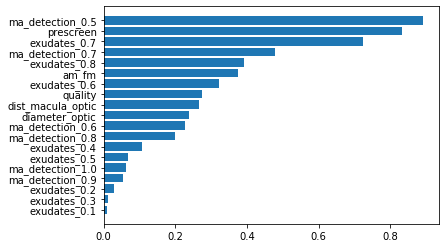

In [7]:
reg = LogisticRegression()
reg.fit(x_train, y_train)

def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

features_names = X.columns.values
f_importances(np.abs(reg.coef_[0]), features_names)

## Feature Selection
- From the features importance plot above, we see that ma_detection_0.5 and exudates_0.7 are the best feature among the ma_detection and exudates features respectively.
- To avoid multicollinearity, we will select ma_detection_0.5 to represent the ma_detection features, and exudates_0.7 to represent the exudates features.
- Other variables seem to be significant on predicting the target class, therefore there are preserved as our final list of features.

### Final list of features:
0. quality: The binary result of quality assessment. 0 = bad quality 1 = sufficient quality.
1. prescreen: The binary result of pre-screening, where 1 indicates severe retinal abnormality and 0 its lack.
2. ma_detection_0.5: The results of MA detection, which is the number of MAs found at the confidence level alpha = 0.5
3. exudates_0.7: The number of exudates found at the confidence level alpha = 0.7 with normalization*.
4. dist_macula_optic: The euclidean distance of the center of the macula and the center of the optic disc to provide important information regarding the patient's condition. This feature is also normalized with the diameter of the ROI.
5. diameter_optic: The diameter of the optic disc.
6. am_fm: The binary result of the AM/FM-based classification.



In [8]:
Y2 = df["Class"]
X2 = df.loc[:, ["quality", "prescreen", "ma_detection_0.5", "exudates_0.7", "dist_macula_optic", "diameter_optic", "am_fm"]]
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(X2, Y2, test_size = 0.4, stratify = Y2, random_state = 123)
print(x_train_2.shape, x_test_2.shape, y_train_2.shape, y_test_2.shape)
print(y_train_2.mean(), y_test_2.mean()) # proportion of class = 1 is similar for training and test set (53%)

(690, 7) (461, 7) (690,) (461,)
0.5304347826086957 0.5314533622559653


### Logistic Regression on the selected features
- A new logistic regression is fitted on the selected features (training set)
- Then, the model is evaluated on both the training and testing set.

In [9]:
reg = LogisticRegression()
reg.fit(x_train_2, y_train_2)

y_train_pred= reg.predict(x_train_2)
y_test_pred= reg.predict(x_test_2)
report_train = classification_report(y_train_2, y_train_pred, output_dict = True)
report_test = classification_report(y_test_2, y_test_pred, output_dict = True)

report_train_df = get_report_df(report_train, label = "training")
report_test_df = get_report_df(report_test, label = "testing")

report_df = pd.concat([report_train_df, report_test_df])
report_df


C:\Users\jy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



,precision,recall,f1,accuracy,sample
0,0.640327,0.642077,0.641201,0.618841,training
0,0.656489,0.702041,0.678501,0.646421,testing


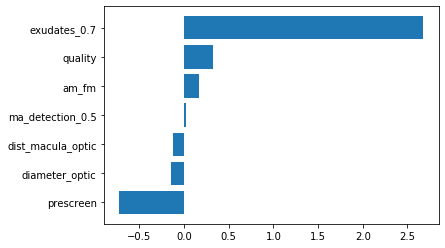

(array([ 0.33007597, -0.72855563,  0.02204903,  2.67820208, -0.12654618,
        -0.14282742,  0.17074268]), array([-0.41547947]))

In [10]:
features_names = X2.columns.values
f_importances(reg.coef_[0], features_names)
reg.coef_[0], reg.intercept_

## Model 2: PCA & Support Vector Machine (SVM)
First, we perform PCA on the training data. We examined elbow curve of the explained variance ratio.  
We determined that the optimal number of principal components to use is 2 based on the elbow curve shown below.

0.9540654174434533

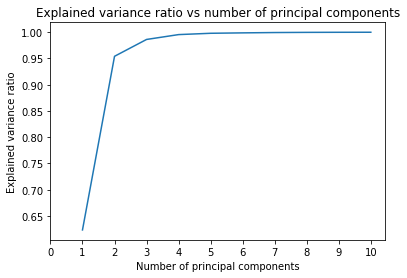

In [11]:
pca = PCA(n_components=10)
X_r = pca.fit(x_train).transform(x_train)
explained = pca.explained_variance_ratio_.cumsum()
xaxis = [j+1 for j in range(len(explained))]

plt.plot(xaxis, explained)
plt.title("Explained variance ratio vs number of principal components")
plt.ylabel("Explained variance ratio")
plt.xlabel("Number of principal components")
plt.xticks(list(range(11)))
explained[1]

### Scatter plot of the two principal components
- Even with the two principal components, the target classes are not linearly separable as shown in the scatter plot.
- Therefore, it is suggested to use a non-linear kernel when performing SVM.

In [12]:
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(x_train)
X_pca_test = pca.fit_transform(x_test)

X_pca_train_plot = pd.DataFrame(X_pca_train)
X_pca_train_plot["y"] = y_train.values
X_pca_train_plot["y"] = X_pca_train_plot["y"].astype(str)
X_pca_train_plot.columns = ["PC1", "PC2", "y"]
fig = px.scatter(X_pca_train_plot, x="PC1", y = "PC2", color = "y", opacity =0.6, title = "Scatter plot of PC2 vs PC1") 
plot(fig)



'temp-plot.html'

# Support Vector Machine (SVM) with Radial Basis Function kernel (RBF)
- A SVM model with RBF kernel  is trained on the PCA generated training features and evaluated on the PCA-generated testing features.
- The evaluation metrics, e.g. precision, recall, f1 score and accuracy is used to evaluate the model and the results are shown on the table below.

In [13]:
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(x_train)
X_pca_test = pca.fit_transform(x_test)

svm = SVC(kernel = "rbf", C = 1, max_iter = 1e4, random_state = 123, gamma = "scale")
svm.fit(X_pca_train, y_train)
y_train_pred= svm.predict(X_pca_train)
y_test_pred= svm.predict(X_pca_test)
report_train = classification_report(y_train, y_train_pred, output_dict = True)
report_test = classification_report(y_test, y_test_pred, output_dict = True)

report_train_df = get_report_df(report_train, label = "training")
report_test_df = get_report_df(report_test, label = "testing")

report_df = pd.concat([report_train_df, report_test_df])
report_df

,precision,recall,f1,accuracy,sample
0,0.699605,0.483607,0.571890,0.615942,training
0,0.763314,0.526531,0.623188,0.661605,testing


## Model 3: Random Forest

In [14]:
%%time
RF = RandomForestClassifier(max_leaf_nodes=16,n_jobs=-1, random_state = 123)
param_grid = {"n_estimators": np.arange(5,100,5)}
rf_grid_cv = GridSearchCV(RF, param_grid, cv=5)
#fit model to data
rf_grid_cv.fit(x_train, y_train)
print('Best n_estimators:', rf_grid_cv.best_params_['n_estimators'])
print('Best Score:', rf_grid_cv.best_score_)

Best n_estimators: 40
Best Score: 0.6536231884057971
Wall time: 21.4 s


Text(0.5, 1.0, 'CV Mean Accuracy vs n_estimators')

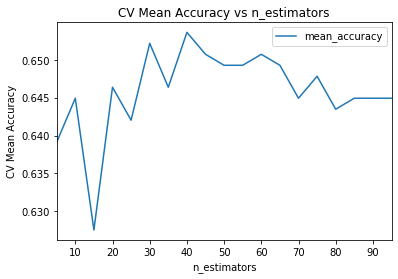

In [15]:
#Data Frame 

rf_df = pd.DataFrame(dict(n_estimators = param_grid["n_estimators"], mean_accuracy = rf_grid_cv.cv_results_["mean_test_score"]))
rf_df.plot(x = "n_estimators", y = "mean_accuracy")
plt.xlabel("n_estimators")
plt.ylabel("CV Mean Accuracy")
plt.title("CV Mean Accuracy vs n_estimators")



In [16]:
y_train_pred= rf_grid_cv.predict(x_train)
y_test_pred= rf_grid_cv.predict(x_test)

report_train = classification_report(y_train, y_train_pred, output_dict = True)
report_test = classification_report(y_test, y_test_pred, output_dict = True)

report_train_df = get_report_df(report_train, label = "training")
report_test_df = get_report_df(report_test, label = "testing")

report_df = pd.concat([report_train_df, report_test_df])
report_df


,precision,recall,f1,accuracy,sample
0,0.849530,0.740437,0.791241,0.792754,training
0,0.679012,0.673469,0.676230,0.657267,testing


## Model 4: K-Nearest Neighbors Classifier
k-Nearest Neighbors (KNN or k-NN) is a supervised machine learning model. 
Supervised learning is when a model learns from data that is already labeled.
A supervised learning model takes in a set of input objects and output values.
The model then trains on that data to learn how to map the inputs to the desired output so it can learn to make predictions on unseen data.
k-NN models work by taking a data point and looking at the ‘k’ closest labeled data points. The data point is then assigned the label of the majority of the ‘k’ closest points.

<img src="https://miro.medium.com/max/929/1*T8Pnw0kiVbrPGnqnB2I_Zw.jpeg">

As mentioned above in Data Partitioning:
We Split the data into 60% training set and 40% testing set.
The KNN model is fitted with the training data (X_train and Y_train) with a default K of 5
The fitted KNN model is tested on the test data set (x_test)

In [17]:
## Default K value of 5 using Euclidean distance
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred= knn.predict(x_test)
print("Score: ",knn.score(x_test, y_test))
print(classification_report(y_test, y_pred))

Score:  0.6702819956616052
              precision    recall  f1-score   support

           0       0.63      0.72      0.67       216
           1       0.72      0.62      0.67       245

    accuracy                           0.67       461
   macro avg       0.67      0.67      0.67       461
weighted avg       0.68      0.67      0.67       461



Hypertuning model parameters using GridSearchCV to determine the K value

In [18]:
#create new a knn model
knn3 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {"n_neighbors": np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn3, param_grid, cv=5)
#fit model to data
knn_gscv.fit(x_train, y_train)
print('Best K-value:', knn_gscv.best_params_['n_neighbors'])
print('Best Score:', knn_gscv.best_score_)

Best K-value: 10
Best Score: 0.6434782608695652


Text(0.5, 1.0, 'CV Mean Accuracy vs K')

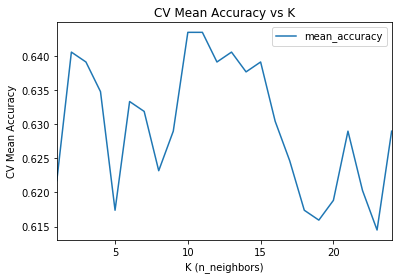

In [19]:
df = pd.DataFrame(dict(mean_accuracy = knn_gscv.cv_results_["mean_test_score"], n_neighbors = param_grid["n_neighbors"]))
df.plot(x = "n_neighbors", y = "mean_accuracy")
plt.xlabel("K (n_neighbors)")
plt.ylabel("CV Mean Accuracy")
plt.title("CV Mean Accuracy vs K")

### Based on the results GridSearchCV, K-value of 10 with Cross Validation is used for the KNN model

In [20]:
y_train_pred= knn_gscv.predict(x_train)
y_test_pred= knn_gscv.predict(x_test)

report_train = classification_report(y_train, y_train_pred, output_dict = True)
report_test = classification_report(y_test, y_test_pred, output_dict = True)

report_train_df = get_report_df(report_train, label = "training")
report_test_df = get_report_df(report_test, label = "testing")

report_df = pd.concat([report_train_df, report_test_df])
report_df


,precision,recall,f1,accuracy,sample
0,0.785455,0.590164,0.673947,0.697101,training
0,0.758427,0.551020,0.638298,0.668113,testing


# Model 5: Improved model using boosting (XGBoost)

In [21]:
%%time
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 

xgb_model = XGBClassifier()

param_grid = {
#  'max_depth':np.arange(2,20, 1),
    "n_estimators": np.arange(5,300,5)
}

xgb_cv = GridSearchCV(estimator = xgb_model, param_grid = param_grid)
xgb_cv.fit(x_train, y_train)
print('Best n_estimators:', xgb_cv.best_params_['n_estimators'])
print('Best Score:', xgb_cv.best_score_)

C:\Users\jy\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



Best n_estimators: 95
Best Score: 0.672463768115942
Wall time: 32.3 s


Text(0.5, 1.0, 'CV Mean Accuracy vs n_estimators')

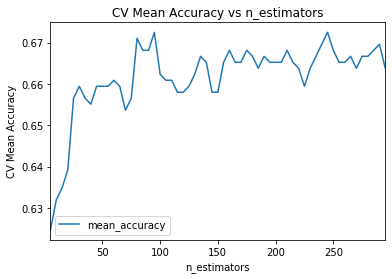

In [22]:
xgb_df = pd.DataFrame(dict(mean_accuracy = xgb_cv.cv_results_["mean_test_score"], n_estimators = param_grid["n_estimators"]))
xgb_df.plot(x = "n_estimators", y = "mean_accuracy")
plt.xlabel("n_estimators")
plt.ylabel("CV Mean Accuracy")
plt.title("CV Mean Accuracy vs n_estimators")

In [23]:
y_train_pred= xgb_cv.predict(x_train)
y_test_pred= xgb_cv.predict(x_test)

report_train = classification_report(y_train, y_train_pred, output_dict = True)
report_test = classification_report(y_test, y_test_pred, output_dict = True)

report_train_df = get_report_df(report_train, label = "training")
report_test_df = get_report_df(report_test, label = "testing")

report_df = pd.concat([report_train_df, report_test_df])
report_df


,precision,recall,f1,accuracy,sample
0,0.966258,0.860656,0.910405,0.910145,training
0,0.710638,0.681633,0.695833,0.683297,testing
